<a href="https://colab.research.google.com/github/countya/ggsample02_mine/blob/master/robotics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


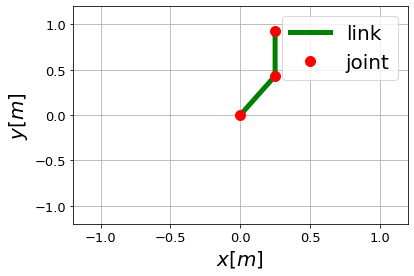

In [2]:
# -*- coding: utf-8 -*-
import numpy as np
from numpy import sin,cos
import matplotlib.pyplot as plt
# 同次変換行列(x軸方向に並進，z軸周りに回転)
def T(l,th):
  Ti = np.matrix((
  (cos(th), -sin(th), l*cos(th)),
  (sin(th), cos(th), l*sin(th)),
  (0., 0., 1.)));
  return Ti
# 順運動学の計算
def arm2_fk(l1, l2, th1, th2):
# 原点座標（縦ベクトル）
  vec = np.array([[0.],[0.],[1.]] );
  # 順運動学の計算
  (x1, y1, z1) = T(l1, th1)*vec; # 第1関節の位置
  (x2, y2, z2) = T(l1, th1)*T(l2, th2)*vec; # 第2関節の位置
  return x1, y1, x2, y2
# グラフの描画
def plot(x, y):
  fn = "Times New Roman"
  # グラフ表示の設定
  fig = plt.figure()
  ax = fig.add_subplot(111, facecolor="w")
  ax.tick_params(labelsize=13) # 軸のフォントサイズ
  plt.xlabel("$x [m]$", fontsize=20, fontname=fn)
  plt.ylabel("$y [m]$", fontsize=20, fontname=fn)
  plt.plot(x, y,"-g",lw=5,label="link") # リンクの描画
  plt.plot(x, y,"or",lw=5, ms=10,label="joint") # 関節の描画
  plt.xlim(-1.2,1.2)
  plt.ylim(-1.2,1.2)
  plt.grid()
  plt.legend(fontsize=20) # 凡例
  plt.show()
def main():
  # 2リンクアームのパラメータ
  (l1, l2) = (0.5, 0.5); #リンク1と2の長さ
  (th1, th2) = np.radians((60, 30)) # 第1, 2の関節角度
  # 順運動学の計算
  (x1, y1, x2, y2) = arm2_fk(l1, l2, th1, th2)
  # ロボットアームの描画
  x = (0, x1, x2)
  y = (0, y1, y2)
  plot(x, y)
if __name__ == '__main__':
  main()